# Spotify Streaming History: Exploratory Data Analysis Project

In this project we are going to explore my `Spotify` usage. `Spotify` is one the most famous and popular music streaming platform. The dataset used here showcases my personal usage of this platform. 

Here on this dataset we can see: 
* The list of songs I played
* Who are my preferred artist
* How long my usage was and more

I downloaded this dataset from the Spotify's `Privacy Setting` section, which allows one to download their personal usage data. With this dataset I'm trying to analyse my streaming history and usage. 

For this EDA Project I'm going to use several tools such as `Jupyter Notebook`,`Python` and Python Libraries such as `numpy, pandas, matplotlib, seaborn, wordcloud, jovian`.

## 0. Imports

In [1]:
%matplotlib inline # To show the matplotlib charts on the Jupyter Notebook ( No Popups )
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn
from wordcloud import WordCloud # Import for Word Cloud

## 1. Downloading the Dataset

One can can download the ZIP file with a copy of most of the personal data by using the automated `Download your data` function on the `Privacy Settings` section of account page.

### Instructions for downloading the dataset

> 1. Go to the `Privacy Settting` Page of your Spotify Account.
> 2. Scroll to the bottom and you'll see a section called `Download Your Data`.
> 3. There's a three step process with instruction to download the data.
> 4. You have to to `Request` for your data. You'll get an confirmation email from Spotify to `Confirm` the request.
> 6. After collecting all the info, Spotify will create a `Zip File` and send you an email with the `link` to download it.
> 7. If you can't find the email, you can request again from your `Privacy Settting` Page.

* For More Information: https://support.spotify.com/us/article/data-rights-and-privacy-settings/

<img src="Pictures/2.png" width="450" align="right" />
<img src="Pictures/3.png" width="450" align="left" />
<img src="Pictures/4.png" width="450" align="right" />
<img src="Pictures/1.png" width="450" align="left" /> 

### What kind or information you'll get ?

The download will include information about your:
> 1. Identity
> 2. Inferences
> 3. User Data
> 4. Playlists
> 5. Streaming History
> 6. Searches
> 7. List of items saved in Your Library 
> 8. Number of followers you have
> 9. Number of accounts you follow
> 10. Names of the artists you follow
> 11. Payment and subscription data. 

For more detailed information about what is included in each file of your download, use `Read Me First` pdf file that comes along with your all other files in the zipped folder.

### Note:

* All the files that comes along with the information is in `JSON` format.
* You can read the files with `read_json` method and use it for analysis.
* Or you can load the data and then convert it into `csv` file.

<img src="Pictures/5.png" />

### How to read the JSON file

In [3]:
df = pd.read_json("StreamingHistory0.json") # Load the JSON File into a datafeame
df.head() # Read the dataframe

,endTime,artistName,trackName,msPlayed
0,2020-07-26 05:32,Fotty Seven,Chaud,192311
1,2020-07-27 07:34,DaBaby,ROCKSTAR (feat. Roddy Ricch),181733
2,2020-07-27 07:38,THE SCOTTS,THE SCOTTS,165977
3,2020-07-27 07:39,Logic,Perfect,100291
4,2020-07-27 07:43,Roddy Ricch,The Box,196652


## 2. Data Preparation and Cleaning

The `zipped folder` contains a lot of information regarding `My Account`. 
But here we'll mostly focus on the `Streaming History` only.

Steps to do:

> 1. To merge the two different Streaming History Files.
> 2. To convert `endTime` column into proper Date-Time format column
> 3. To convert the `msPlayed` into proper time column `(Hours, Minutes)`
> 4. To add more columns which can be useful for further analysis

### 2.1 Import Data

We'll use `read_json` method from Pandas module to read the JSON file.

Pandas also offers a wide variety of usability. We can read several other formats as well as per our need.

* For more info (`read_josn`) : https://pandas.pydata.org/docs/reference/api/pandas.read_json.html
* For more info (`pandas`) : https://pandas.pydata.org/docs/index.html

In [4]:
df1 = pd.read_json("StreamingHistory0.json") # Read the first file
df2 = pd.read_json("StreamingHistory1.json") # Read the second file

Here we just have two files so we made two different dataframes manually. 

If there are several files, one can make a function to loop all the files and load several datasets.

In [5]:
df1.head() # To read top 5 rows of the first dataframe

,endTime,artistName,trackName,msPlayed
0,2020-07-26 05:32,Fotty Seven,Chaud,192311
1,2020-07-27 07:34,DaBaby,ROCKSTAR (feat. Roddy Ricch),181733
2,2020-07-27 07:38,THE SCOTTS,THE SCOTTS,165977
3,2020-07-27 07:39,Logic,Perfect,100291
4,2020-07-27 07:43,Roddy Ricch,The Box,196652


In [6]:
df1.tail() # To read bottom 5 rows of the first dataframe

,endTime,artistName,trackName,msPlayed
9995,2021-04-23 13:58,24kGoldn,Mood (feat. iann dior),140533
9996,2021-04-23 14:01,24kGoldn,Mood (feat. iann dior),140533
9997,2021-04-23 14:03,24kGoldn,Mood (feat. iann dior),140533
9998,2021-04-23 14:06,24kGoldn,Mood (feat. iann dior),140533
9999,2021-04-23 14:09,24kGoldn,Mood (feat. iann dior),140533


In [7]:
df2.head() # To read top 5 rows of the second dataframe

,endTime,artistName,trackName,msPlayed
0,2021-04-23 14:11,24kGoldn,Mood (feat. iann dior),140533
1,2021-04-23 14:16,24kGoldn,Mood (feat. iann dior),274676
2,2021-04-23 14:23,Mvndvr,Mind Reader,2441
3,2021-04-23 14:23,24kGoldn,Mood (feat. iann dior),128897
4,2021-04-23 14:23,Nathan Evans,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,20313


In [8]:
df2.tail() # To read top 5 rows of the second dataframe

,endTime,artistName,trackName,msPlayed
799,2021-04-30 21:45,Nikhil D'Souza,People,188689
800,2021-04-30 21:49,Nikhil D'Souza,People,188689
801,2021-04-30 21:52,Nikhil D'Souza,People,188689
802,2021-04-30 21:56,Nikhil D'Souza,People,188689
803,2021-04-30 21:59,Nikhil D'Souza,People,188689


We can see that there's two different dataset available for us. Both of these contains the `Spotify Streaming` history.

We can carry on with either of the datasets or we can merge it together to make one.

> **I'll go with merging the datasets to have a bigger dataset**

### 2.2 Merging the Data

We'll use `pd.concat` method from Pandas module to concatenate two datasets with similar columns.

Apart from that we also use two other options to add two dataframe like `merge` and `join`.

* For more info (`pd.concat`) : https://pandas.pydata.org/docs/reference/api/pandas.concat.html
* For more info on other methods : https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [9]:
spotify_stream_df = pd.concat([df1,df2], ignore_index=True) # To concatenate the two dataframes

As we added the two different dataframes with `concat`method, we have also given an additional attribute called `ignore_index` as `True`. 

This helps to reset the index from start, as both of the dataframes has their own index.

In [10]:
spotify_stream_df # To read all the dataframe at once

,endTime,artistName,trackName,msPlayed
0,2020-07-26 05:32,Fotty Seven,Chaud,192311
1,2020-07-27 07:34,DaBaby,ROCKSTAR (feat. Roddy Ricch),181733
2,2020-07-27 07:38,THE SCOTTS,THE SCOTTS,165977
3,2020-07-27 07:39,Logic,Perfect,100291
4,2020-07-27 07:43,Roddy Ricch,The Box,196652
...,...,...,...,...
10799,2021-04-30 21:45,Nikhil D'Souza,People,188689
10800,2021-04-30 21:49,Nikhil D'Souza,People,188689
10801,2021-04-30 21:52,Nikhil D'Souza,People,188689
10802,2021-04-30 21:56,Nikhil D'Souza,People,188689


In [11]:
spotify_stream_df.shape # To see the shape of the merged dataframe

(10804, 4)

In [12]:
spotify_stream_df.info() # info method offers an quick option to check the data contained in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10804 entries, 0 to 10803
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     10804 non-null  object
 1   artistName  10804 non-null  object
 2   trackName   10804 non-null  object
 3   msPlayed    10804 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 337.8+ KB


We can see that there's no `null` or `NaN` data available in the dataset with the help of `info` function.

* For more info (`info`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html 

In [13]:
spotify_stream_df.nunique() # To see the unique elemetns present in each column

endTime       8024
artistName    2359
trackName     4068
msPlayed      7264
dtype: int64

With `nunique` function we can count the number of unique elements we have in the different columns of the dataset

* For more info (`nunique`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html 

In [14]:
spotify_stream_df.sample(10) # To check a sample of the data

,endTime,artistName,trackName,msPlayed
2804,2020-10-20 18:27,Lost Frequencies,Are You With Me,52084
126,2020-07-31 20:26,Justin Bieber,The Feeling,244906
9035,2021-04-18 09:25,CHEN,For You,65052
8768,2021-04-13 16:03,Sam Tinnesz,Play with Fire (feat. Yacht Money),18414
8172,2021-04-03 07:32,Justin Bieber,Intentions,24396
6128,2021-01-29 14:27,DJ Snake,Future Pt 2,21747
4936,2021-01-09 06:32,Jome,Cinnamon,160561
728,2020-08-16 07:53,Harry Styles,Cherry,11424
3616,2020-11-18 19:13,Tate McRae,all my friends are fake,11657
4817,2021-01-05 09:13,Justin Bieber,Holy (feat. Chance The Rapper),212093


With `sample` function we can get a sample of the available dataset, we can provide additional `integer` attribute to get the desired number of samples.

* For more info (`sample`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html 

In [15]:
len(spotify_stream_df["artistName"].unique()) # Length of unique artist

2359

We can see that there's 2359 number of unique artist in my streaming history

In [16]:
len(spotify_stream_df["trackName"].unique()) # Length of unique tracks

4068

We can see that there's 4068 number of unique songs in my streaming history

* For more info (`unique`): https://pandas.pydata.org/docs/reference/api/pandas.unique.html

### 2.3 Cleaning and Formatting

We'll use `pd.to_datetime` method from Pandas module to convert a object column into proper date time column.

We'll also use `pd.DatetimeIndex` method from Pandas module to obtain several uniuqe information from `date time` column like `year, month, day, weekday, time, hour, day_name`.

* For more info (`pd.to_datetime`) : https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 
* For more info (`pd.DatetimeIndex`) : https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html 

In [17]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["endTime"]) # To create a additional column

Here we used the `to_datetime` module to obatin the proper date time format and then we added that into a new column called `Play-Time`.

In [18]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1 

Here we used the `DatetimeIndex` module to obatin the several unique information. We also added them to a new columns as per their representaion and information.

Information contained in different columns :
1. `year` has information about the year when we played that song
2. `month` has information about the month when we played that song
3. `weekday` has information about the weekday when we played that song
4. `time` has information about the time when we played that song
5. `hours` has information about the hour when we played that song
6. `day-name` has information about the day with the name when we played that song. Here we used `apply` method for pandas dataframe with `lambda` function.

We also added a new column called `count` to keep track of the count of the songs.

* For more info (`apply`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
* For more info (`lambda`) : https://www.w3schools.com/python/python_lambda.asp

In [19]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

Here we used the `to_timedelta` module to obatin the information regarding the time frame of the song played in mili-seconds.

We also converted the information given in mili-seconds into proper format and added it into another column called `Time-Played (hh-mm-ss)`.

For more info (`to_timedelta`) : https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html

In [20]:
def hours(td):
    '''To get the hour information'''
    return td.seconds/3600
def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

Here we made two seperate functions called `hours` and `minutes` which will help us to convert the time we got in `Time-Played (hh-mm-ss)` to convert in approximate minutes and hours. 

We used the `apply` method to apply those two function along with the `round` method here to do the calculation and approximation.

* For more info (`round`) : https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.round.html

In [22]:
spotify_stream_df.head() # To check the newly formed dataset with additional columns

,endTime,artistName,trackName,msPlayed,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2020-07-26 05:32,Fotty Seven,Chaud,192311,2020-07-26 05:32:00,2020,7,26,6,05:32:00,5,Sunday,1,0 days 00:03:12.311000,0.053,3.200
1,2020-07-27 07:34,DaBaby,ROCKSTAR (feat. Roddy Ricch),181733,2020-07-27 07:34:00,2020,7,27,0,07:34:00,7,Monday,1,0 days 00:03:01.733000,0.050,3.017
2,2020-07-27 07:38,THE SCOTTS,THE SCOTTS,165977,2020-07-27 07:38:00,2020,7,27,0,07:38:00,7,Monday,1,0 days 00:02:45.977000,0.046,2.750
3,2020-07-27 07:39,Logic,Perfect,100291,2020-07-27 07:39:00,2020,7,27,0,07:39:00,7,Monday,1,0 days 00:01:40.291000,0.028,1.667
4,2020-07-27 07:43,Roddy Ricch,The Box,196652,2020-07-27 07:43:00,2020,7,27,0,07:43:00,7,Monday,1,0 days 00:03:16.652000,0.054,3.267


We can see that now we have a lot of columns, some of which are not useful anymore, so we'll drop few of them.

We are dropping the following columns:
1. `endTime` as we got a new column called `Play-Time` which has all information with proper format.
2. `msPlayed` as we got the `Time-Played (hh-mm-ss)` in proper format.
3. `Time-Played (hh-mm-ss)` as we got the approx time in minutes and hours in `Listening Time(Hours)` and `Listening Time(Minutes)`.

* For more info (`drop`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 

In [23]:
spotify_stream_df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

Here I added `inplace` as `True` which allows us to update the dataframe directly, rather than assigning it again.

In [25]:
spotify_stream_df.describe() # Final check for any abnormality

,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,10804.000000,10804.000000,10804.000000,10804.000000,10804.000000,10804.0,10804.000000,10804.000000
mean,2020.561829,5.819326,16.268327,2.943817,13.245927,1.0,0.034158,2.049620
std,0.496185,3.755626,8.981046,1.960852,5.085855,0.0,0.028722,1.723019
min,2020.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2020.000000,2.000000,9.000000,1.000000,9.000000,1.0,0.004000,0.250000
50%,2021.000000,4.000000,16.000000,3.000000,13.000000,1.0,0.039000,2.333000
75%,2021.000000,9.000000,24.000000,4.000000,17.000000,1.0,0.056000,3.350000
max,2021.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.388000,23.300000


**Note: Now we have a clean and properly formatted data we can go on with our analysis.**

## 3. Exploratory Analysis and Visualization

*  Here we'll explore the demographics of different columns to gain insight. 
* It can be helpful to understand how the dataset is and how can we get the most out of it.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

With the above code we are setting up our visualisation environment. We are using `Seaborna` and `Matplotlib` modules to shape up our graphs and images. We can set it for seperate section or once for all.

* For more info (`matplotlib`) : https://matplotlib.org/ 
* For more info (`seaborn`) : https://seaborn.pydata.org/

### 3.1 Artist Name  (Exploration)

1. We can check what is the percentage of unique artist we have.
2. We can also check the top 10 unique artist we have.

### 3.1.1 We can check what is the percentage of unique artist we have.

In [28]:
unique_artists = spotify_stream_df["artistName"].nunique() # Count number of unique artist
total_artists = spotify_stream_df["artistName"].count() # Count total artist
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage
unique_artist_percentage

21.834505738615327

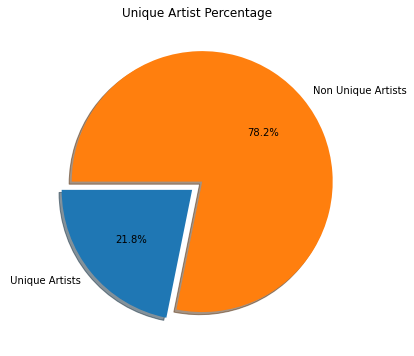

In [34]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists]) # Make an array out of the results
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] # Make a lable for them

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage");

1. The unique artist percentage comes around `21.83 %`.
2. We can also confirm this through the `pie chart` we made.

We made the pie chart from `matplotlib` module, we also gave several attributes inside the `pie` function like the data, labels, start angle, shadow and more. 

* For more info (`pie chart`) : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html 

**Note: I generally prefer to plot the graphs using Object Oriented API format, so you'll find me using this method most of the times.**

`fig, ax = plt.subplots(figsize=(8,8))`

> because the pyplot API is generally less-flexible than the object-oriented API. 



### 3.1.2 We can also check the top 10 unique artist we have.

In [27]:
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(15)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Lauv,11.053,666.443,329
Pritam,10.194,611.762,178
Billie Eilish,9.745,583.334,219
Jome,8.428,503.377,178
KR$NA,7.581,454.893,141
Tash Sultana,6.949,418.753,99
Harry Styles,6.795,405.402,149
Troye Sivan,6.528,389.699,152
Justin Bieber,5.726,342.826,113


We used`groupby` function to make categorical groups of similar artists and then with `sum` we summed up all the counts. Then we sorted the values by the `sort_values` function and arragnged it in descending order.

We also sorted few columns to show, they are `"Listening Time(Hours)","Listening Time(Minutes)","Count"`.

**Note: Here we can see that the Top 10 Artist list varies in two ways:**
> 1. In terms of number of counts i.e. number of times songs played
> 2. In terms of number of hours i.e. number of hours songs played


* For more info (`groupby`) : https://pandas.pydata.org/docs/reference/groupby.html 
* For more info (`sum`) : https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.sum.html 
* For more info (`sort_values`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html 

### 3.1.3 Top 10 Unique Artist (count) : Based on the number of count

In [35]:
top_10_artist_time_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Lauv,11.053,666.443,329
Pritam,10.194,611.762,178
Billie Eilish,9.745,583.334,219
Jome,8.428,503.377,178
KR$NA,7.581,454.893,141
Tash Sultana,6.949,418.753,99
Harry Styles,6.795,405.402,149
Troye Sivan,6.528,389.699,152
Justin Bieber,5.726,342.826,113


Here we made a list of **Top 10 Unique Artist** with the help of `groupby` function.

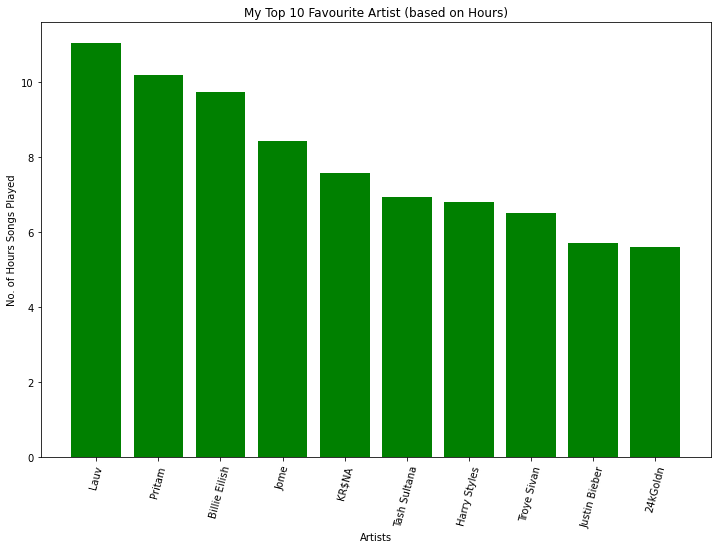

In [36]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

Here we made a `bar` chart to show the same list in a better visualisation. We gave two axis `x & y` as the attributes and `colour` for better visual. We used `set` method to give `title`,`xlable` and `ylabel`.


By This chart we can also see how close these artist are in terms of play time in hours.


* For more info (`bar`) : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html 
* For more info (`set`) : https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.set.html 

### 3.1.4 Top 10 Unique Artist (hours) : Based on number of hours 

In [37]:
top_10_artist_count_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Lauv,11.053,666.443,329
Billie Eilish,9.745,583.334,219
Jome,8.428,503.377,178
Pritam,10.194,611.762,178
Troye Sivan,6.528,389.699,152
Harry Styles,6.795,405.402,149
24kGoldn,5.620,336.295,146
KR$NA,7.581,454.893,141
Jugraj Sandhu,3.762,225.785,122


Here we made a list of **Top 10 Unique Artist** with the help of `groupby` function.

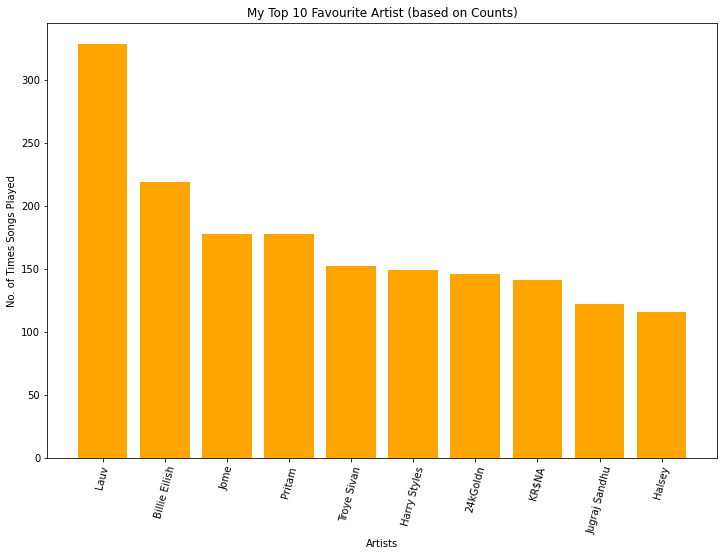

In [38]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='orange')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);

Here we made a `bar` chart to show the same list in a better visualisation. By this chart we can also see how close these artist are in terms of play time in counts.


 * For more info (`xticks`): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

### 3.1.5 Top 10 Unique Artist (hours) & Top 10 Unique Artist (Count)

Both graphs are plotted side by side along with their average mean for better comparision.

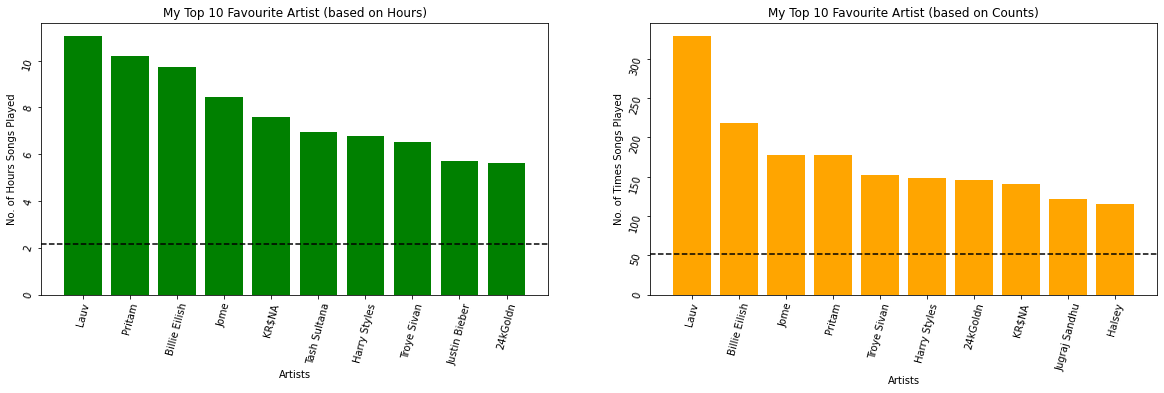

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75);
ax1.axhline(top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75);
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");

Here we made two `bar` charts side by side to show the changes in `Top 10 Unique Artist`. By this comprehensive chart we can see that the list varies as per `number or hours` and `number of counts`.

Here we can see the `Object Oriented API` way of plotting, as we plotted two `subplots` together by refering them as a unique objects. We also added an additional horizontal line with `axhline` function. This line represent the `mean` value of the top 100 artirst in both graphs.


* For more info (`axhline`) : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html 
* For more info (`subplots`) : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html 

### 3.2 Song Tracks (Exploration)

1. We can check what is the percentage of unique artist we have.
2. We can also check the top 10 unique songs we have.

### 3.2.1 We can check what is the percentage of unique songs we have

In [41]:
unique_songs = spotify_stream_df["trackName"].nunique()
total_songs = spotify_stream_df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

37.652721214365044

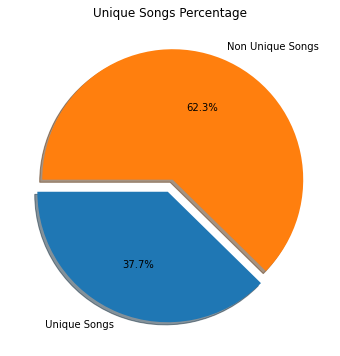

In [43]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

1. The unique songs percentage comes around `37.65 %`.
2. We can also confirm this through the `pie chart` we made.

### 3.2.2 We can also check the top 10 unique songs we have

* We already know that there can be variation as per the number of hours and number of counts.
* So we'll directly plot those two graphs together side by side to confirm it.

In [44]:
top_10_songs_time_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

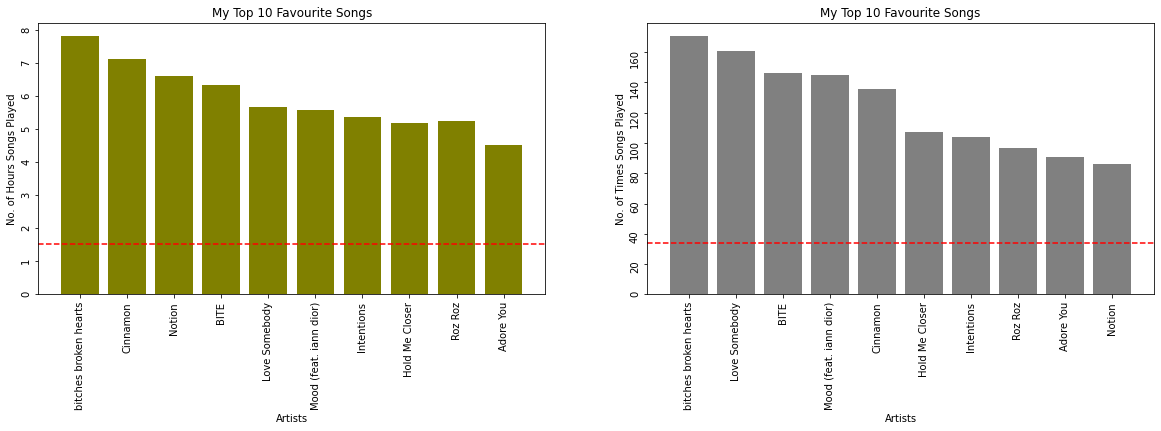

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="olive")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="gray")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

As we alredy know that there can be difference between the charts when we use `number of hours` and `number of counts`. So here we directly made two `bar` charts side by side to show the changes in `Top 10 Unique Artist`.

By this comprehensive chart we can see that the list varies as per `number or hours` and `number of counts`.

### 3.3 Day Wise Usage (Exploration)

Here we'll try to analyse whats is the percentage usage of Spotify Streaming over a Week.

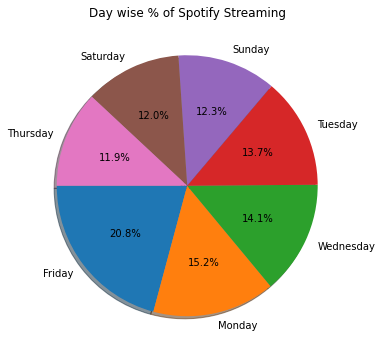

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(spotify_stream_df["day-name"].value_counts(), labels=spotify_stream_df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
plt.title("Day wise % of Spotify Streaming");

This pie charts shows that generally I streamed my Spotify more of Fridays

### 3.4 Average Usage over a day (Exploration)

* Here we'll try to analyse how my spotify streaming varies over a day.
* At what time I use my spotify more regularly then others

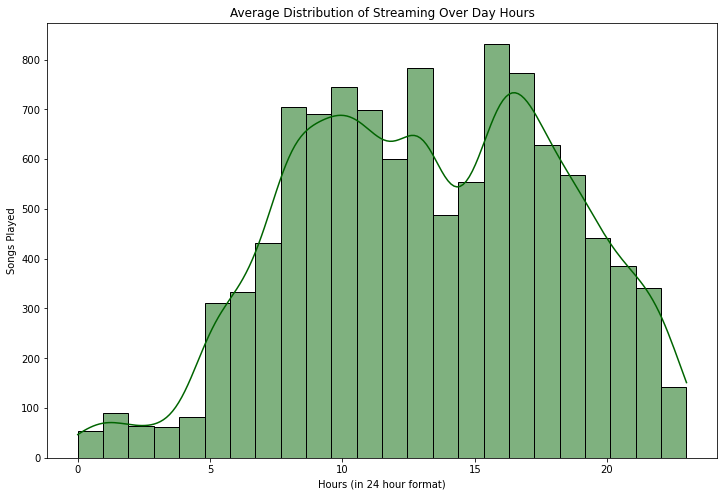

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");

With this histogram graph we can see about my average usage:

1. Maximum around `4-5 PM` hour mark
2. Minimum around `12-1 AM` hour mark

We used `seaborn` based `histplot` module to make a histogram. Seaborn is based on Matplotlib Library only, but it offers better visualisation options.

* For more info (`histplot`) : https://seaborn.pydata.org/generated/seaborn.histplot.html 

### 3.5 Average Usage In a Year (Exploration)

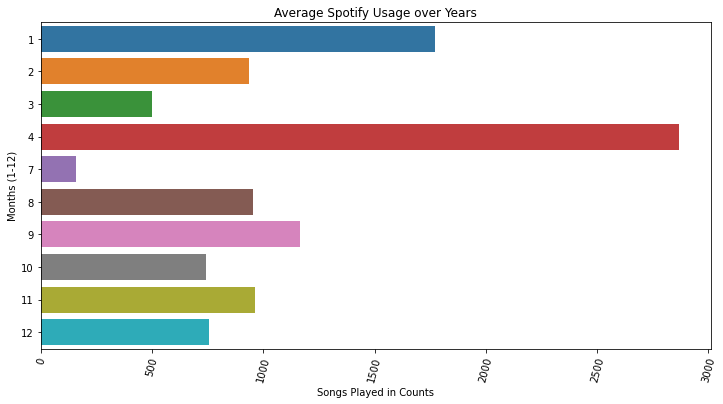

In [53]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)")
plt.xticks(rotation=75);

We plotted this `countplot` which comes with `seaborn` module to show my usage of `Spotify` over years.

We can see that there's a big gap between `4th Month` and `7th month`. This is because I started using the `Spotify` from `July 2020 (7th Month)` and this streaming history is up to `April 2021 (4th Month)` only.

Hence there's no data regarding the month which lies between `4th` and `7th`. But we can also notice that my Spotiy Usage in `April` is way higher than other months. This is a new information for me.

* For more info (`countplot`) : https://seaborn.pydata.org/generated/seaborn.countplot.html 

## 4. Asking and Answering Questions

- Although we have covered most of the useful insights in the previous section.
- We'll stll try to explore more questions based on this dataset.
- These questions can be exploratory, analytical or formative.

### Q1A: How many hours did I spent on Spotify Streaming since the day I signed up for it? 

Here we want to know, how many hours I spend while streaming spotify from the start.

In [54]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum() # Summation of all 
time_spent_hours

369.04200000000003

For this we can simply do a summation of all the time I spent on listening to all songs.
* This comes out to be around **369 Hours**.

### Q1B: What is actual usage in percentage compared to to the total possible? 

Here we want to know, what is the percentage of time I spend on spotify.

This question might seem a bit odd, but we want to know, out of maximum possible hours from the start, how much time we actually spent on Spotify Streaming and we want to know that in percentage.

In [55]:
date_df = spotify_stream_df["Play-Time"] # Making a new dataset of time only

In [56]:
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D") # Calulating total possible days in days
time_difference_hours = time_difference*24 # Converting that in hours by multiplying with 24
time_difference_hours

6688.449999999999

1. In this calculation we subtracted the time, from the first time I used my spotify to the last time.
2. Then we divided that with `np.timedelta64` function to convert the time into days
3. We again multiplied it with 24 to convert it int hours

* This comes out to be around **6688.5 Hours**.

For more info (`np.timedelta`) : https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html 

**Note: I was confused about how to subtract the time with datetime type**

I used this for help : https://bramtunggala.medium.com/a-simple-way-to-finding-the-difference-between-two-dates-in-pandas-179d2714b6c

In [57]:
time_spent_percentage = time_spent_hours/time_difference_hours*100
time_spent_percentage

5.517601237954983

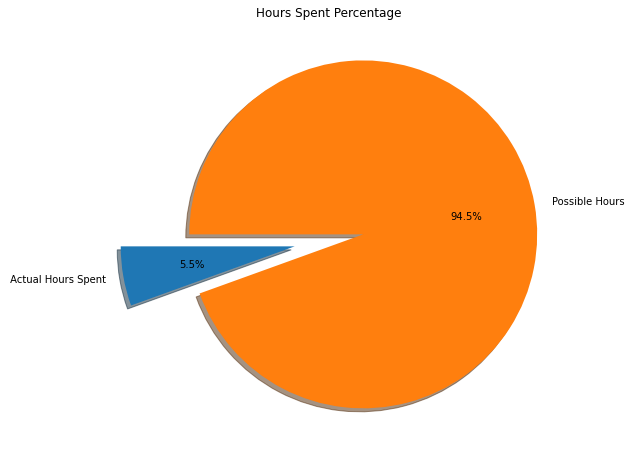

In [58]:
hours_spent_list = np.array([time_spent_hours, time_difference_hours-time_spent_hours])
hours_spent_list_labels = [" Actual Hours Spent", "Possible Hours"]

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(hours_spent_list, labels= hours_spent_list_labels, autopct='%1.1f%%',  explode=[0.2,0.2], startangle=180, shadow = True);
plt.title("Hours Spent Percentage");

### Q1C: What is the average numbers of songs I played daily ?

In [83]:
total_songs = spotify_stream_df["trackName"].count() # Total Songs played

In [82]:
time_difference # Total days when I used Spotify

278.68541666666664

In [85]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

39.0

Here we can see that on an average I played **39** songs per day

### Q2A: Who are my favourite 100 Artist ? Make a word cloud to show them.

Here we want to make a list of my favourite 100 artist based on my daily usage. Further we want to show the generated list in a word cloud for better visualisation.

In [59]:
fav_artist = spotify_stream_df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
Lauv              329
Billie Eilish     219
Jome              178
Pritam            178
Troye Sivan       152
                 ... 
Salman Elahi       21
Atif Aslam         21
ODESZA             20
Bazzi              20
Gurnam Bhullar     20
Name: Count, Length: 100, dtype: int64

Here again we made categorical group with `groupby` function and take a count of it. We also sorted the values with `sort_values` function and picked on `Top 100 Song Tracks`.

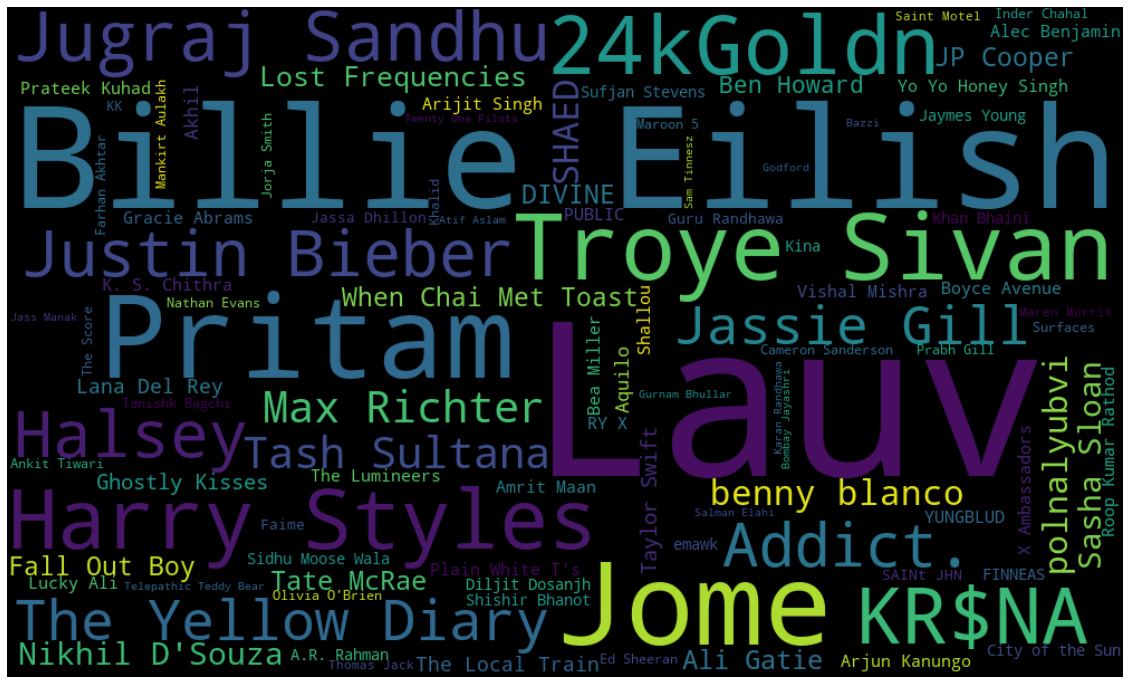

In [60]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

Here we used the `WordCloud` function from `wordcloud` module which allows us to make a word cloud of the given list or series. 
We can addtionally give other attributes like:
1. `max_words` to fix the number of words to display
2. `width` and `heigh` for the size.
3. `normalize_plurals` for removing additional `'s` from the words and more

We also used the `generate_from_frequencies` function to generate the counted words with the given frequencies in the dataframe.

* For more info (`wordcloud`) : https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

### Q2B: Make a `My Favourite Artist` playlist for the user, based on his daily usage.

Here we want to make a playlist of my favourite arist. I guess this is how they Spotify curate playlist for us based on cumulative usage.

In [61]:
my_fav_artist_playlist = spotify_stream_df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)

In [62]:
my_fav_artist_playlist

,,Count
artistName,trackName,
Billie Eilish,bitches broken hearts,171
Lauv,Love Somebody,161
Troye Sivan,BITE,146
24kGoldn,Mood (feat. iann dior),145
Jome,Cinnamon,136
...,...,...
Zayde Wølf,Back at It,14
Mohammed Rafi,Sar Jo Tera Chakraye,14
Akhil,"Duniyaa (From ""Luka Chuppi"")",14


Like before, here we simple made a dataframe with our favourite artists and their songs. This was made the help of `groupby` function but this time we gave two columns to do the categorical grouping of the data. Then collectively we made a list based on the counts.

### Q3: What are My Favourite 100 Songs ? Make a word cloud to show them.

Here we want to see what are top 100 songs that I usually listen to.

In [63]:
fav_songs = spotify_stream_df.groupby(["trackName"])["Count"].count()

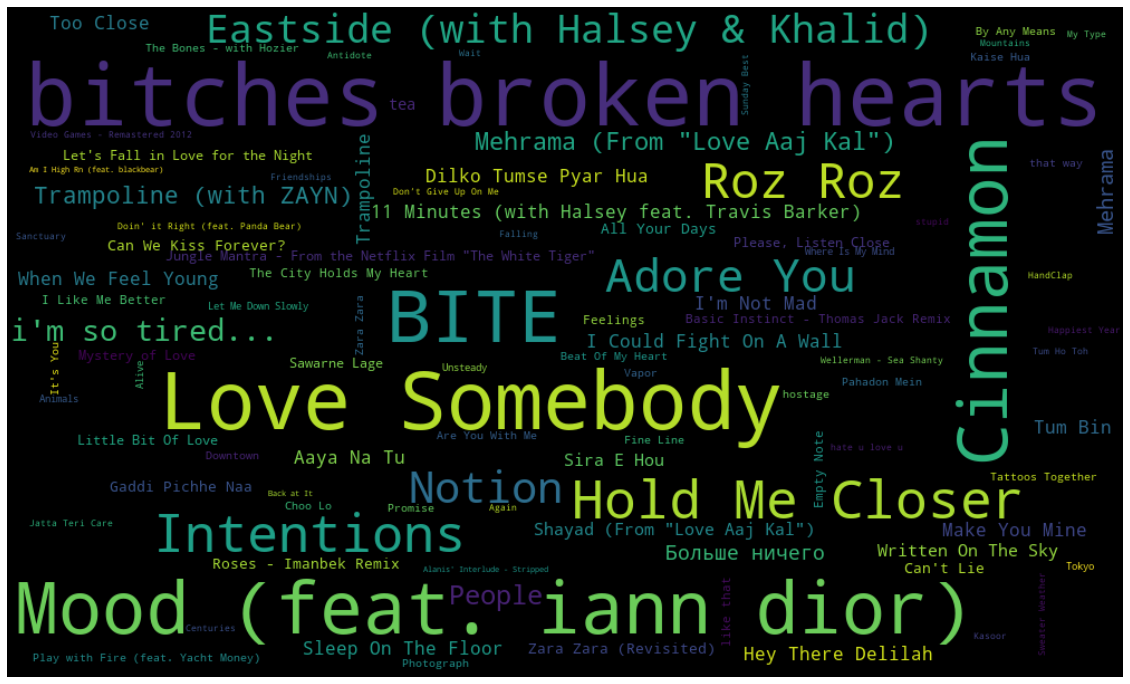

In [64]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

### Q4: Most Usage ( Active usage in a day over a week) ? Show that with a heatmap.

Here we want to see the detail usage of my Spotify Streaming.
1. My usage based on the daily hours.
2. My usage based on the daily days over week.
The heatmap would show at what time of what day I usually listen more songs.

In [65]:
active_usage = spotify_stream_df.groupby(['hours', 'day-name'])['artistName'].size().reset_index()
active_usage_pivot = active_usage.pivot("hours", 'day-name', 'artistName')
active_usage_pivot.head()

day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,5.0,1.0,NaN,NaN,30.0,1.0,17.0
1,2.0,13.0,2.0,23.0,19.0,NaN,30.0
2,5.0,NaN,NaN,1.0,31.0,NaN,27.0
3,NaN,NaN,1.0,1.0,1.0,50.0,9.0
4,12.0,NaN,9.0,13.0,6.0,29.0,13.0


Here first we made a new dataframe with `groupby` like before but then we made a pivoted table with the help of `pivot` function. This gave us a comprehensive chart with `days of the week` and `time of day` and number of songs I played in that particular time/day.

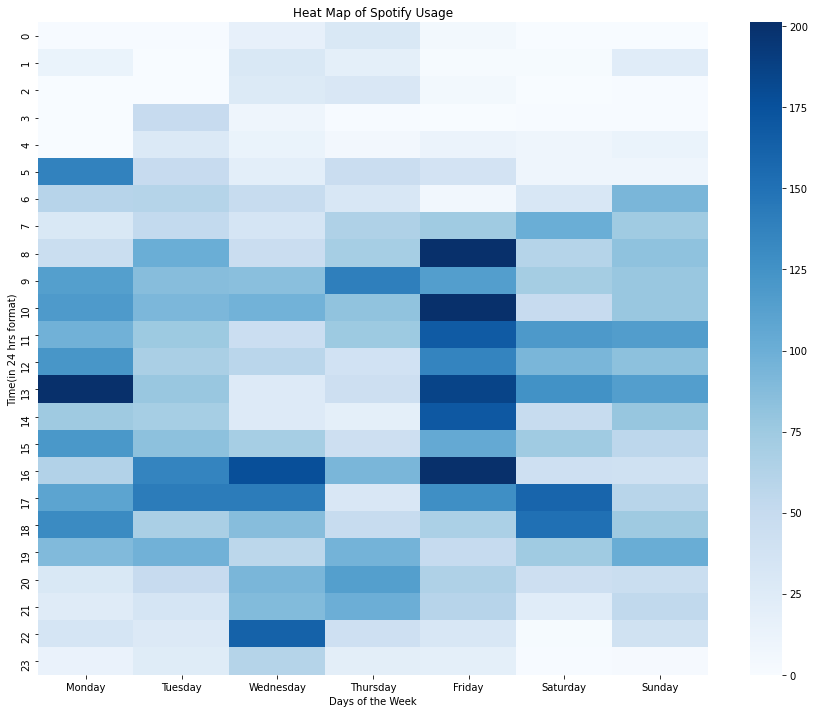

In [66]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");

We plotted the newly constructed dataframe with the help of `heatmap` plot of `seaborn`. 

The `heatmap` plot takes certain arrtibutes like the:
1. `x-axis` for the x-axis and its lables
2. `fillna` along with the table to fill the empltu slots as 0
3. `cmap` for the color of the heatmap chart and more

**We can see that, I'm more active in Spotify on Fridays and between 8AM to 7PM.**

* For more info (`heatmap`) : https://seaborn.pydata.org/generated/seaborn.heatmap.html 

### Q5A: How my usgae varies over a week? Make a countplot to show.

Here we we want to explore more on my usage based on the previous `heatmap`. How my usage varies over week and to confirm that am I really active on fridays or not.

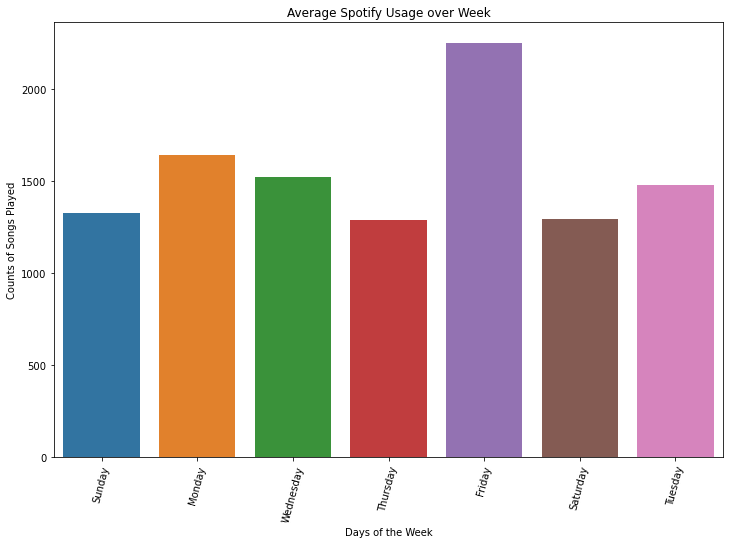

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=spotify_stream_df["day-name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

With this `barplot` we can clearly say that I'm much more active on `Fridays` over other days of the week.

### Q5B: What is the percentage of usage distribution between Weekday and Weekend ?

Here we want to checkthe percentage of songs are played on Weekdays and Weekends. Also what is the average playtime per day in weekend and weekdays.

In [68]:
extra_df = spotify_stream_df.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,8187
True,2617


In [69]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,8187,75.77749
True,2617,24.22251


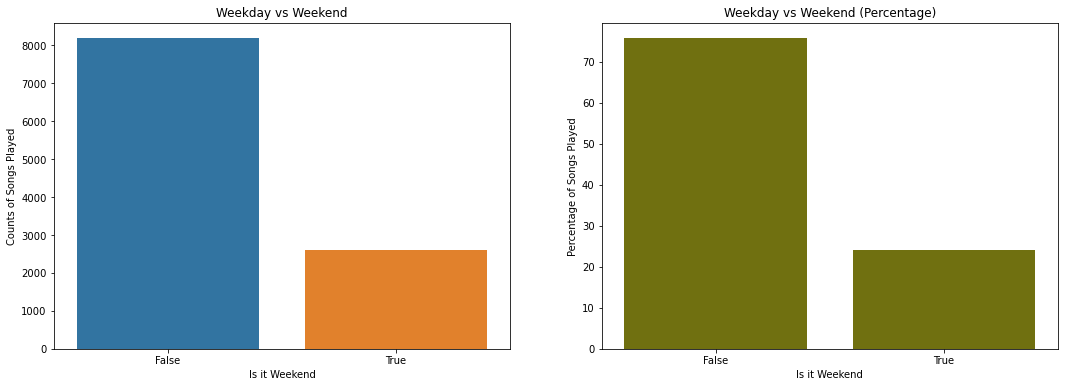

In [86]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");

## 5 Inferences and Conclusions

We've got many useful insights from this dataset. Here's a few of them:

-  I have played songs from 2359 number of Unique Artist which is the `21.83 %` of total artist in my Streaming history.

- I have played 4068 unique songs which is the `37.65 %` of total songs in my Streaming history.  

- I'm most active in Spotify on Fridays.

- My most active hours ranges from `8 AM` to `7 PM`. Maximum around `4PM-5PM` hour and Minimum at`12AM-1PM` hour.

- I played `39 songs` on average per day.

- Since the day I created my Spotify Account, I played the most songs in `April 2021`.

- I have spent almost `369 hours` streaming on spotify till now. That's about `5.5%` of the possible `6688.5 hours`

- My favourite artist whom I've played most is `Lauv`. While my favourite song is `bitches broken hearts` by `Billie Eilish`.


## 6 References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Numpy use guide: https://numpy.org/doc/stable/user/quickstart.html 
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
